In [1]:
import pandas as pd
import os
from tqdm import tqdm
import argparse
import yaml
import matplotlib.pyplot as plt
import tifffile
import seaborn as sns

from utils import *

In [2]:
# General info dataframe
filepath_measurements_info = "/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/sd_tweezers_info_1.csv"
results_dir = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/'

df_general_info = pd.read_csv(filepath_measurements_info, delimiter=';', encoding='utf-8')
df_general_info.head()

,trackmate_file,MTs,first_pulse (frame),last_pulse_start (frame),t_on (frame),t_off (frame),tip_x,tip_y,calibration (mV),bead_type,time_interval (s),comments
0,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,131,251,10,30,98,378,1000,2.8 um myc dyna passivated PEG,0.5,NaN
1,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,169,249,10,30,98,378,1000,2.8 um myc dyna passivated PEG,0.5,NaN
2,/Volumes/cytokinesis-zebrafish-collab/magnetic...,y,13,653,10,30,53,314,1000,2.8 um myc dyna passivated PEG,0.5,NaN
3,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,11,611,10,30,57,360,1000,2.8 um myc dyna passivated PEG,0.5,"one bead stuck during pulses 7,8,9,10"
4,/Volumes/cytokinesis-zebrafish-collab/magnetic...,y,11,531,10,30,82,254,1000,2.8 um myc dyna passivated PEG,0.5,NaN


TODO:
- open files with track data and recalculated data
- check it out 
- plot some stuff
- plot initial point vs end point for rising and relaxing phases

[ 98 378]
Shape of the images array: (300, 695, 665, 3)


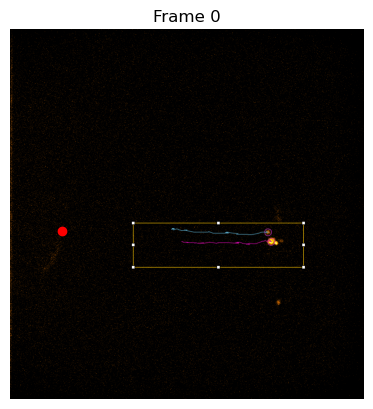

In [3]:
filepath = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/1_measurements/20240523/20240523_s01p01t01/TrackMate capture of 20240523_s01p01t01_1_5sON_15sOFF_1000mV-1.tif'

tip = df_general_info.loc[df_general_info['trackmate_file'].str.contains('20240523_s01p01t01_1_5sON_15sOFF'), ['tip_x', 'tip_y']].values[0]
print(tip)
# Load the time series TIFF file
images = tifffile.imread(filepath)

# Check the shape of the images array (T, Z, Y, X) or (T, Y, X) depending on the data
print("Shape of the images array:", images.shape)

# Plot the first frame of the time series
plt.figure()
plt.imshow(images[0], cmap='gray')
plt.plot(tip[0], tip[1], 'ro')
plt.title('Frame 0')
plt.axis('off')
plt.show()

In [4]:
df_general_info.head(5)

,trackmate_file,MTs,first_pulse (frame),last_pulse_start (frame),t_on (frame),t_off (frame),tip_x,tip_y,calibration (mV),bead_type,time_interval (s),comments
0,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,131,251,10,30,98,378,1000,2.8 um myc dyna passivated PEG,0.5,NaN
1,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,169,249,10,30,98,378,1000,2.8 um myc dyna passivated PEG,0.5,NaN
2,/Volumes/cytokinesis-zebrafish-collab/magnetic...,y,13,653,10,30,53,314,1000,2.8 um myc dyna passivated PEG,0.5,NaN
3,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,11,611,10,30,57,360,1000,2.8 um myc dyna passivated PEG,0.5,"one bead stuck during pulses 7,8,9,10"
4,/Volumes/cytokinesis-zebrafish-collab/magnetic...,y,11,531,10,30,82,254,1000,2.8 um myc dyna passivated PEG,0.5,NaN


In [5]:
data_filepath = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/measurements_extended_info/20240705_s02p01t03_2_5sON_15sOFF_spots_extended.h5'
df = pd.read_hdf(data_filepath, key='df')
df = df.sort_values(by='POSITION_T')
df.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MAGNET_STATUS,PULSE_NUMBER,FORCE [pN],MT_STATUS,DISPLACEMENT [um],CORRECTION_k,CORRECTION_k_ERR,CORRECTION_N,CORRECTION_N_ERR,CORRECTED DISPLACEMENT [um]
23,ID19802,19802,3,12.342706,182.861471,219.098259,0.0,21.0,21,2.5,...,0,1,0.0,n,0.000000,-0.032258,0.000037,225.98979,0.062109,NaN
24,ID19806,19806,3,11.769642,183.614908,219.300297,0.0,22.0,22,2.5,...,0,1,0.0,n,-0.358284,-0.032258,0.000037,225.98979,0.062109,NaN
25,ID19811,19811,3,10.269568,184.481642,218.590017,0.0,23.0,23,2.5,...,0,1,0.0,n,-1.467411,-0.032258,0.000037,225.98979,0.062109,NaN
26,ID19813,19813,3,14.040203,184.944534,218.570263,0.0,24.0,24,2.5,...,0,1,0.0,n,-1.794845,-0.032258,0.000037,225.98979,0.062109,NaN
27,ID19814,19814,3,15.694675,184.674174,218.589858,0.0,25.0,25,2.5,...,0,1,0.0,n,-1.597605,-0.032258,0.000037,225.98979,0.062109,NaN


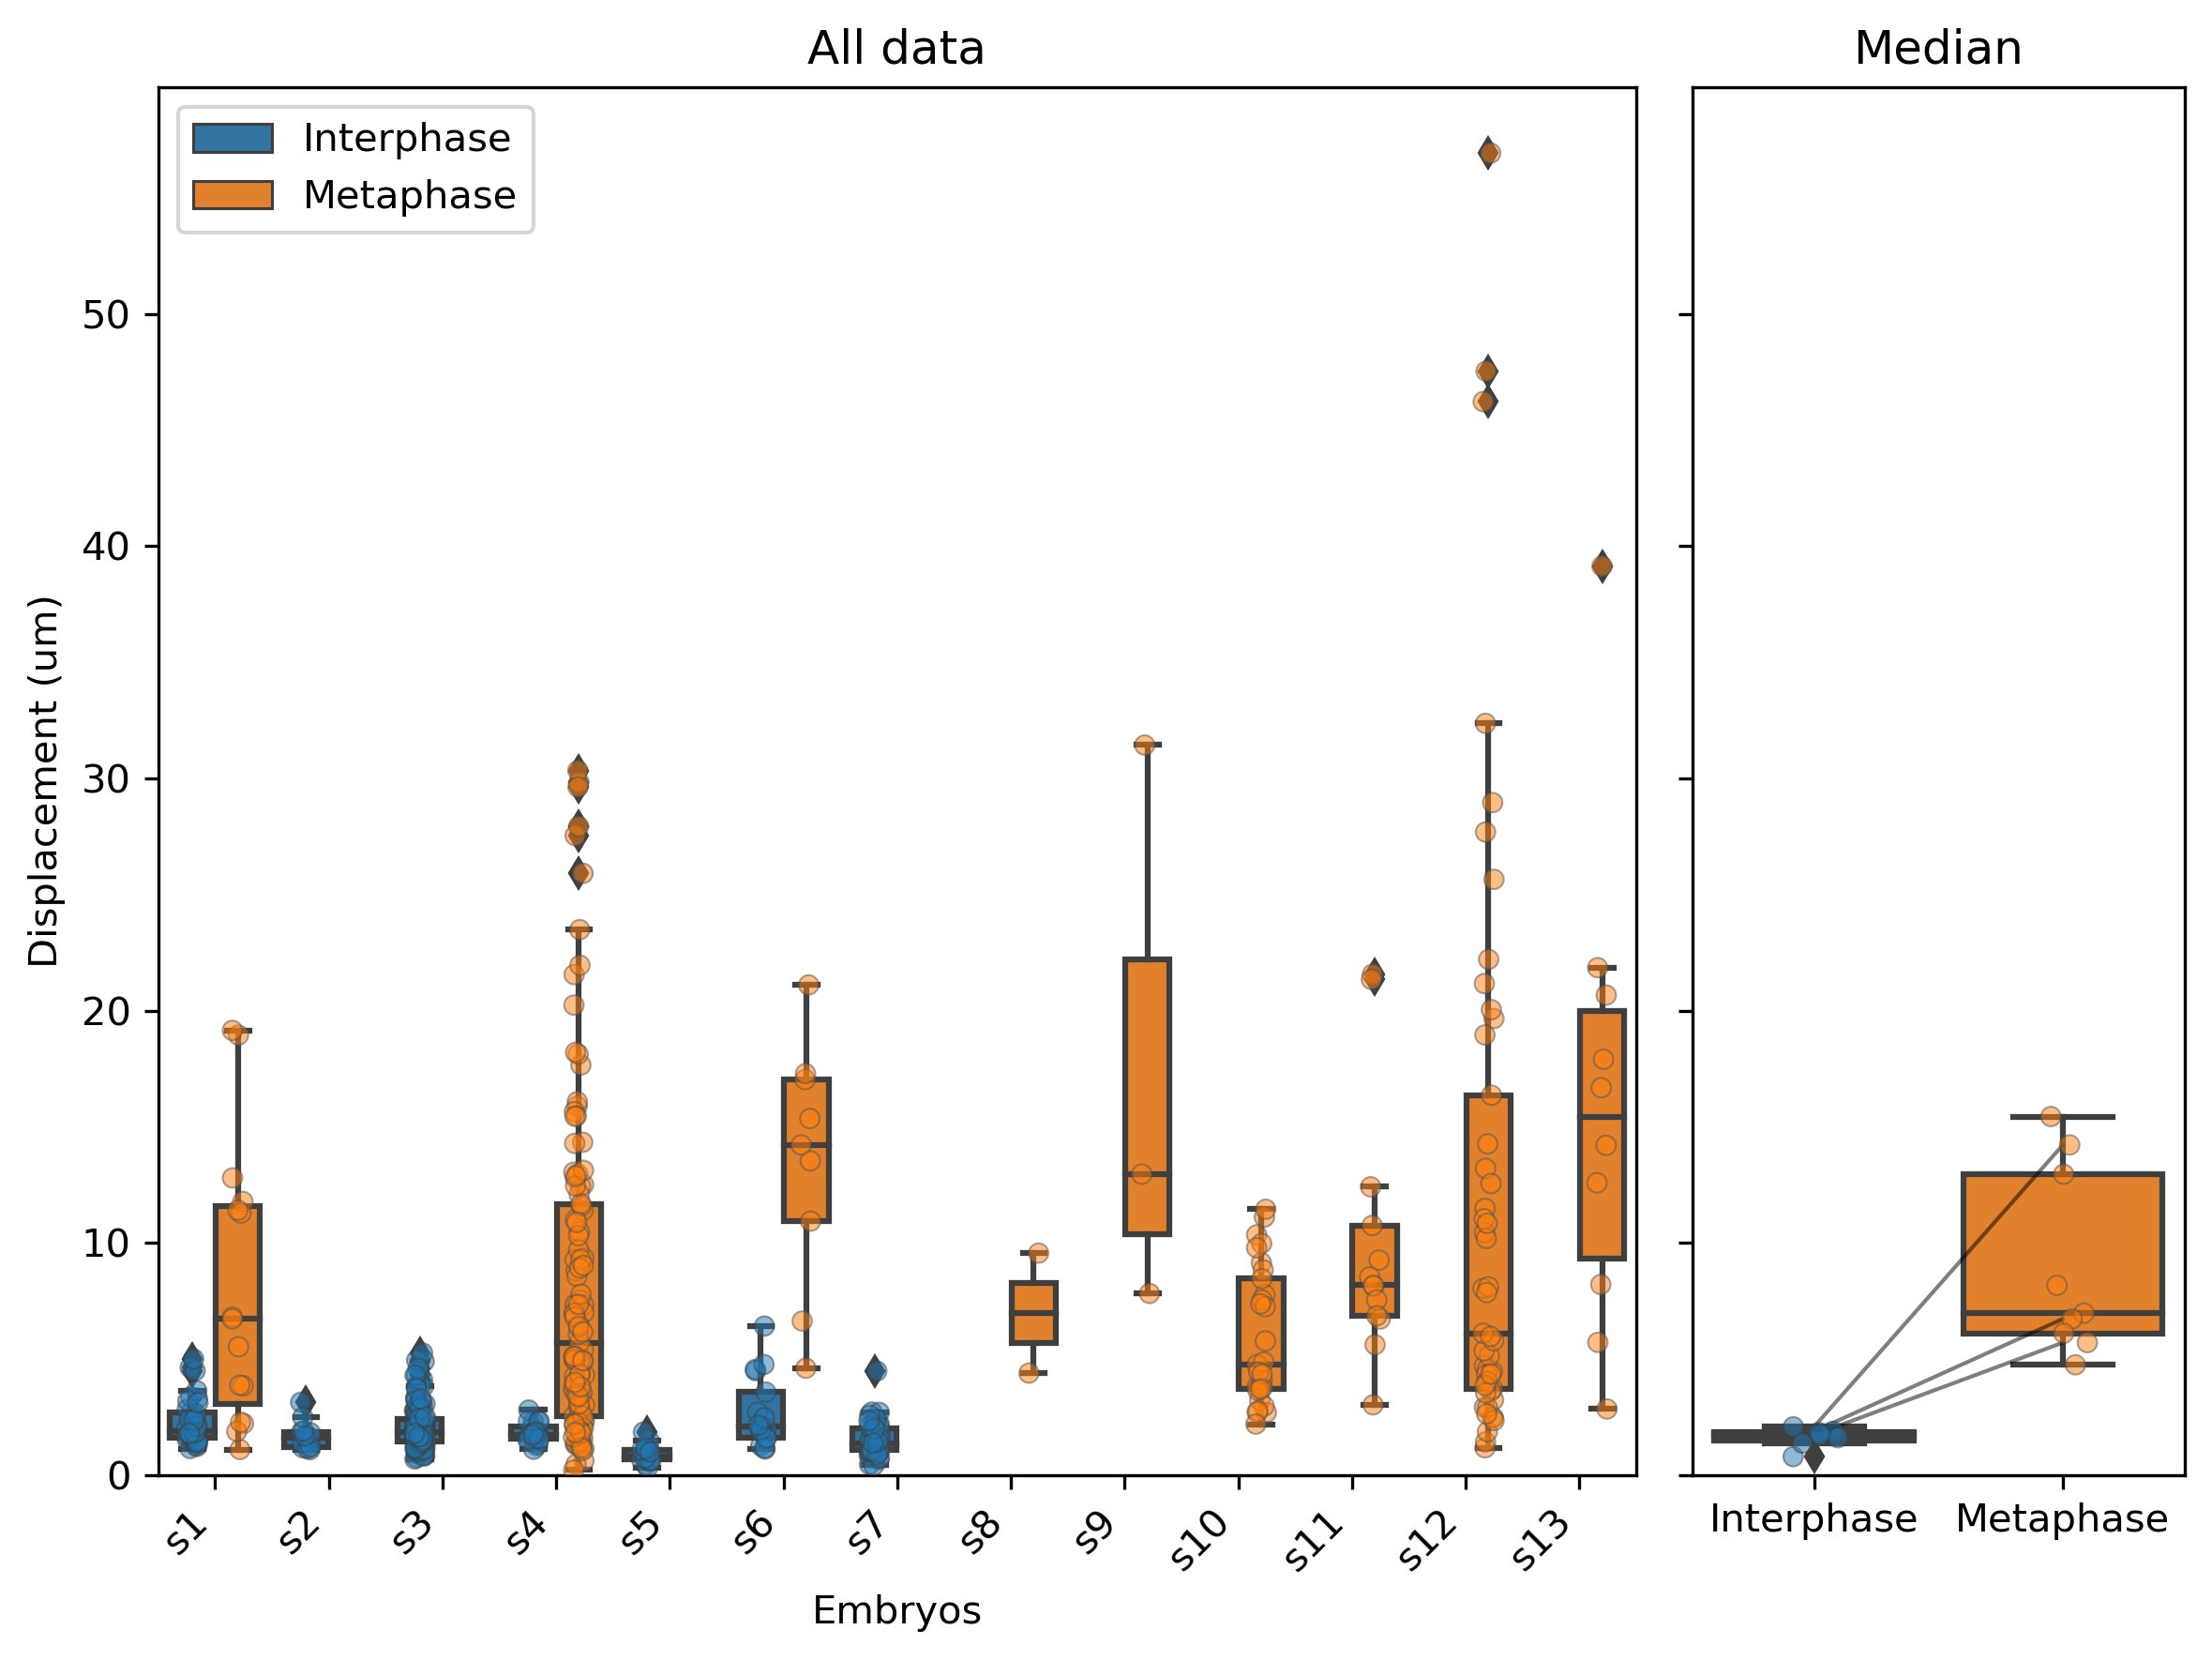

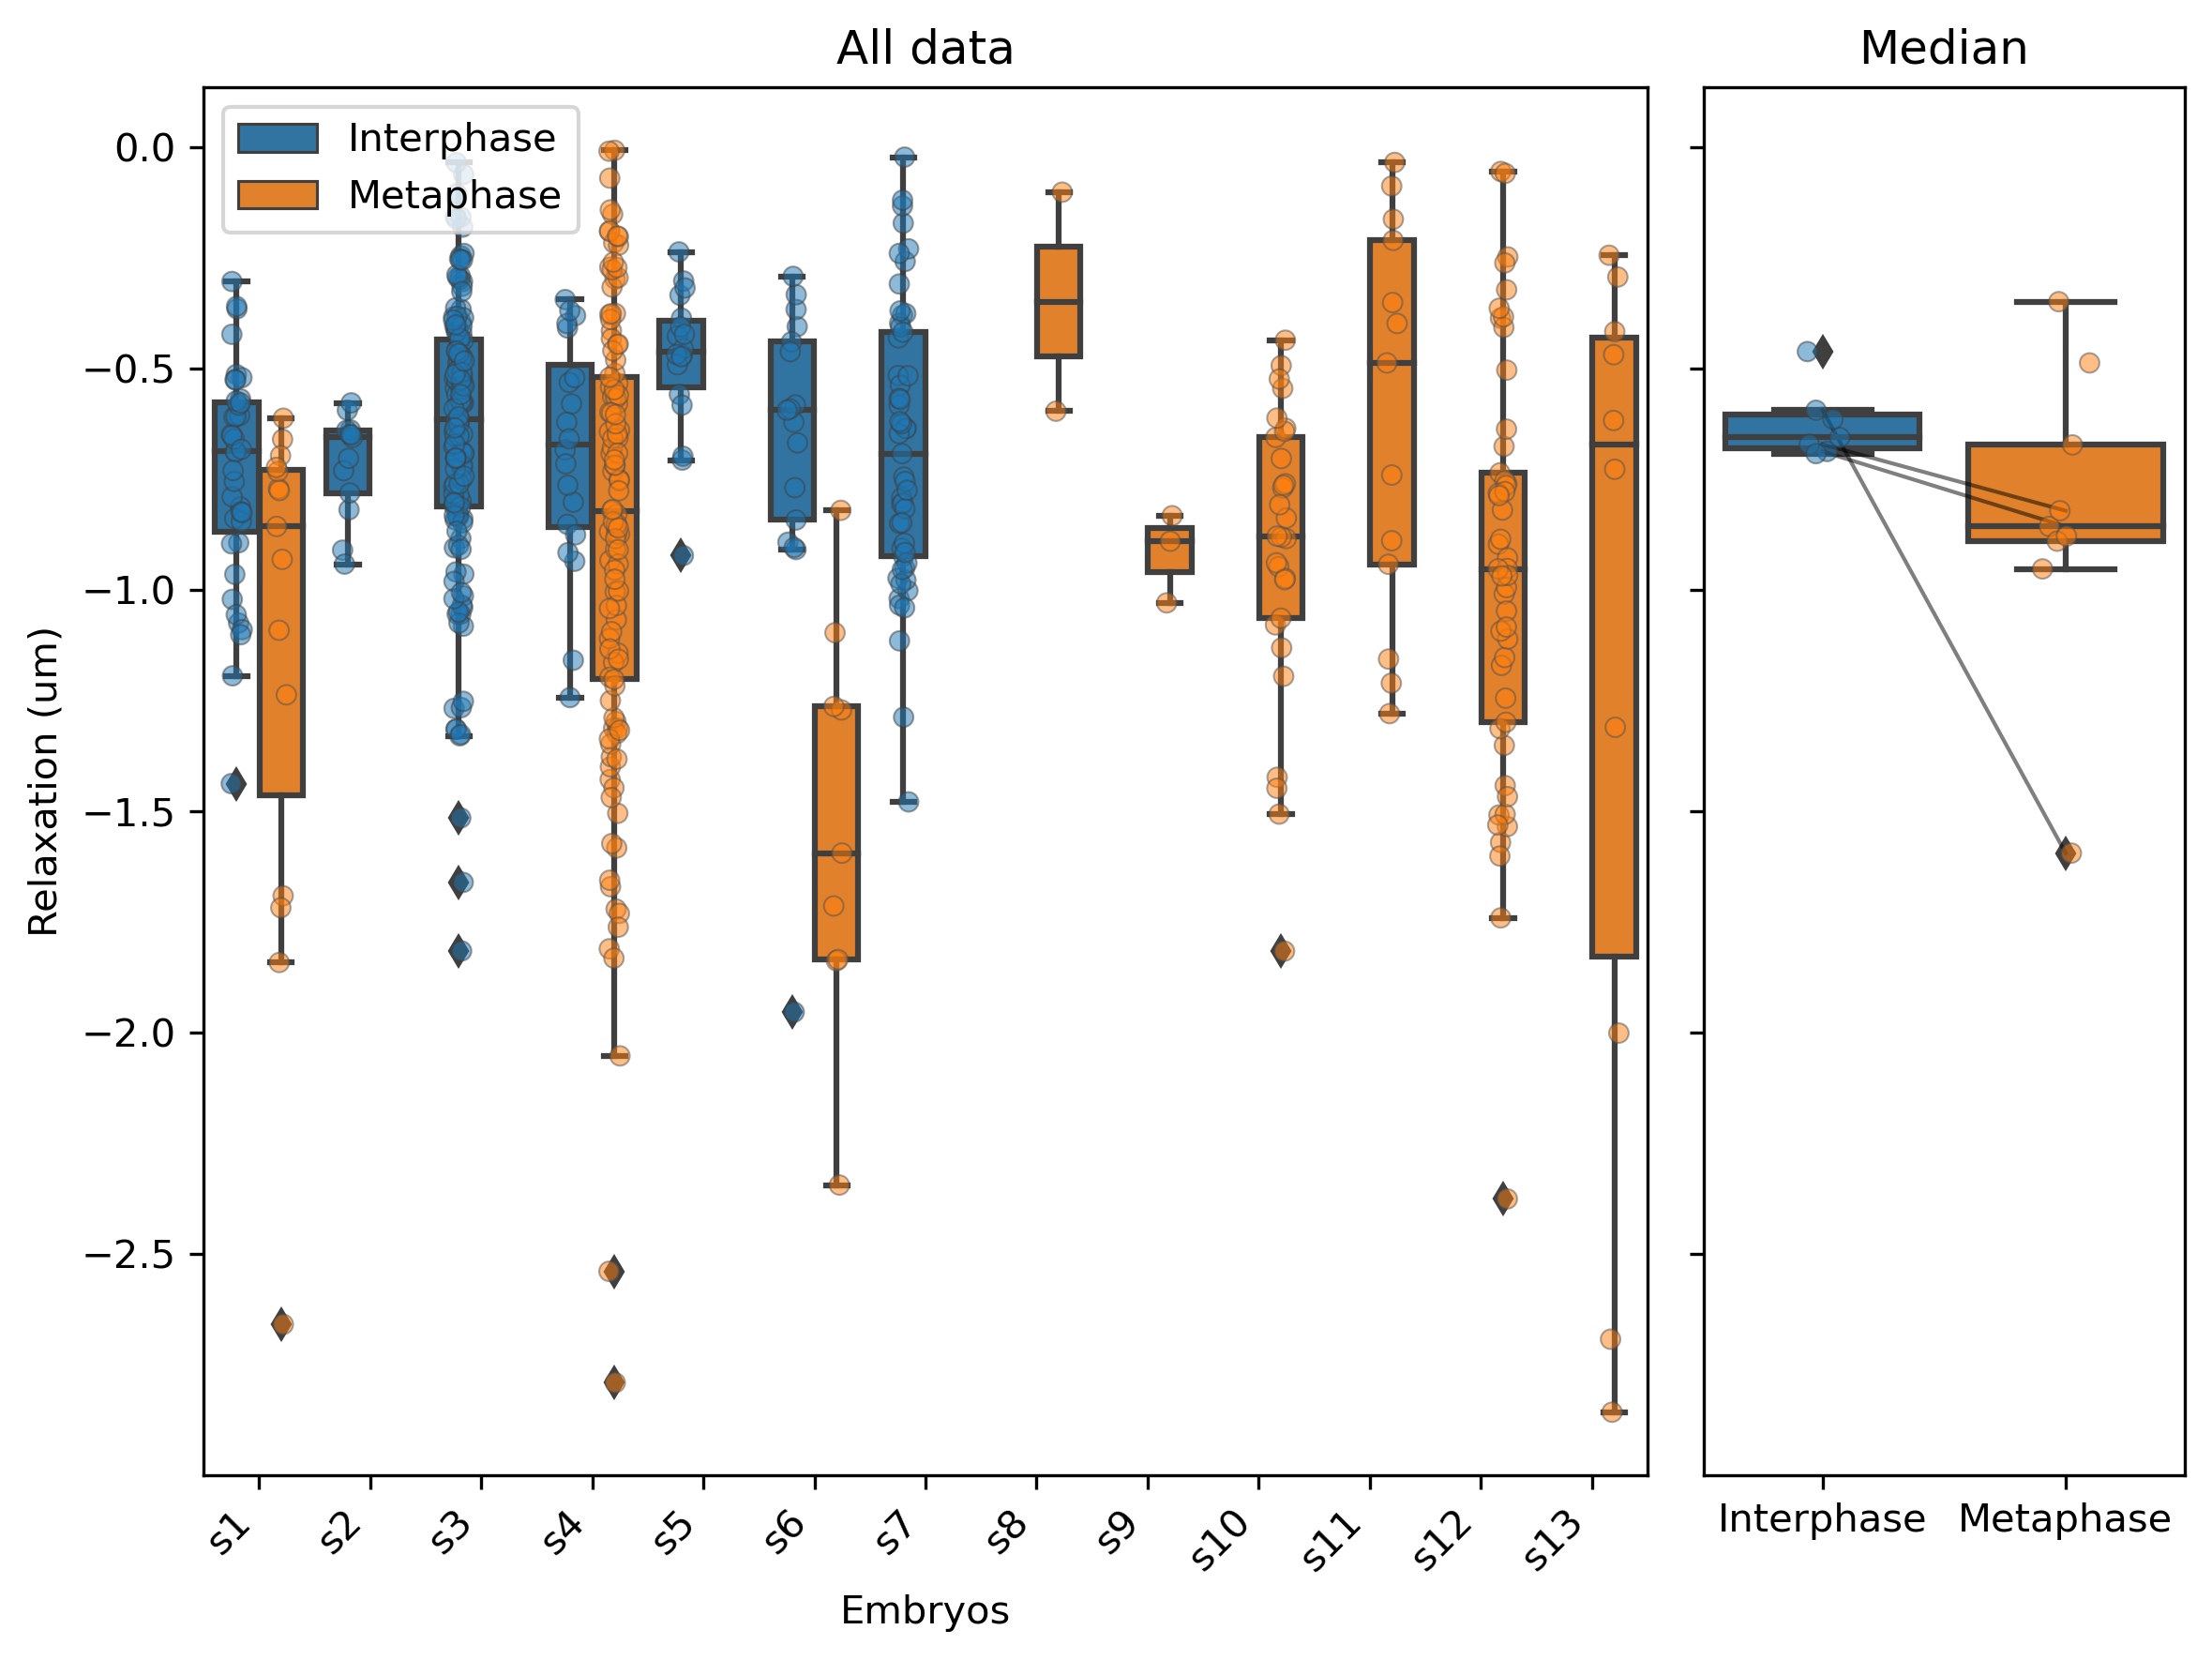

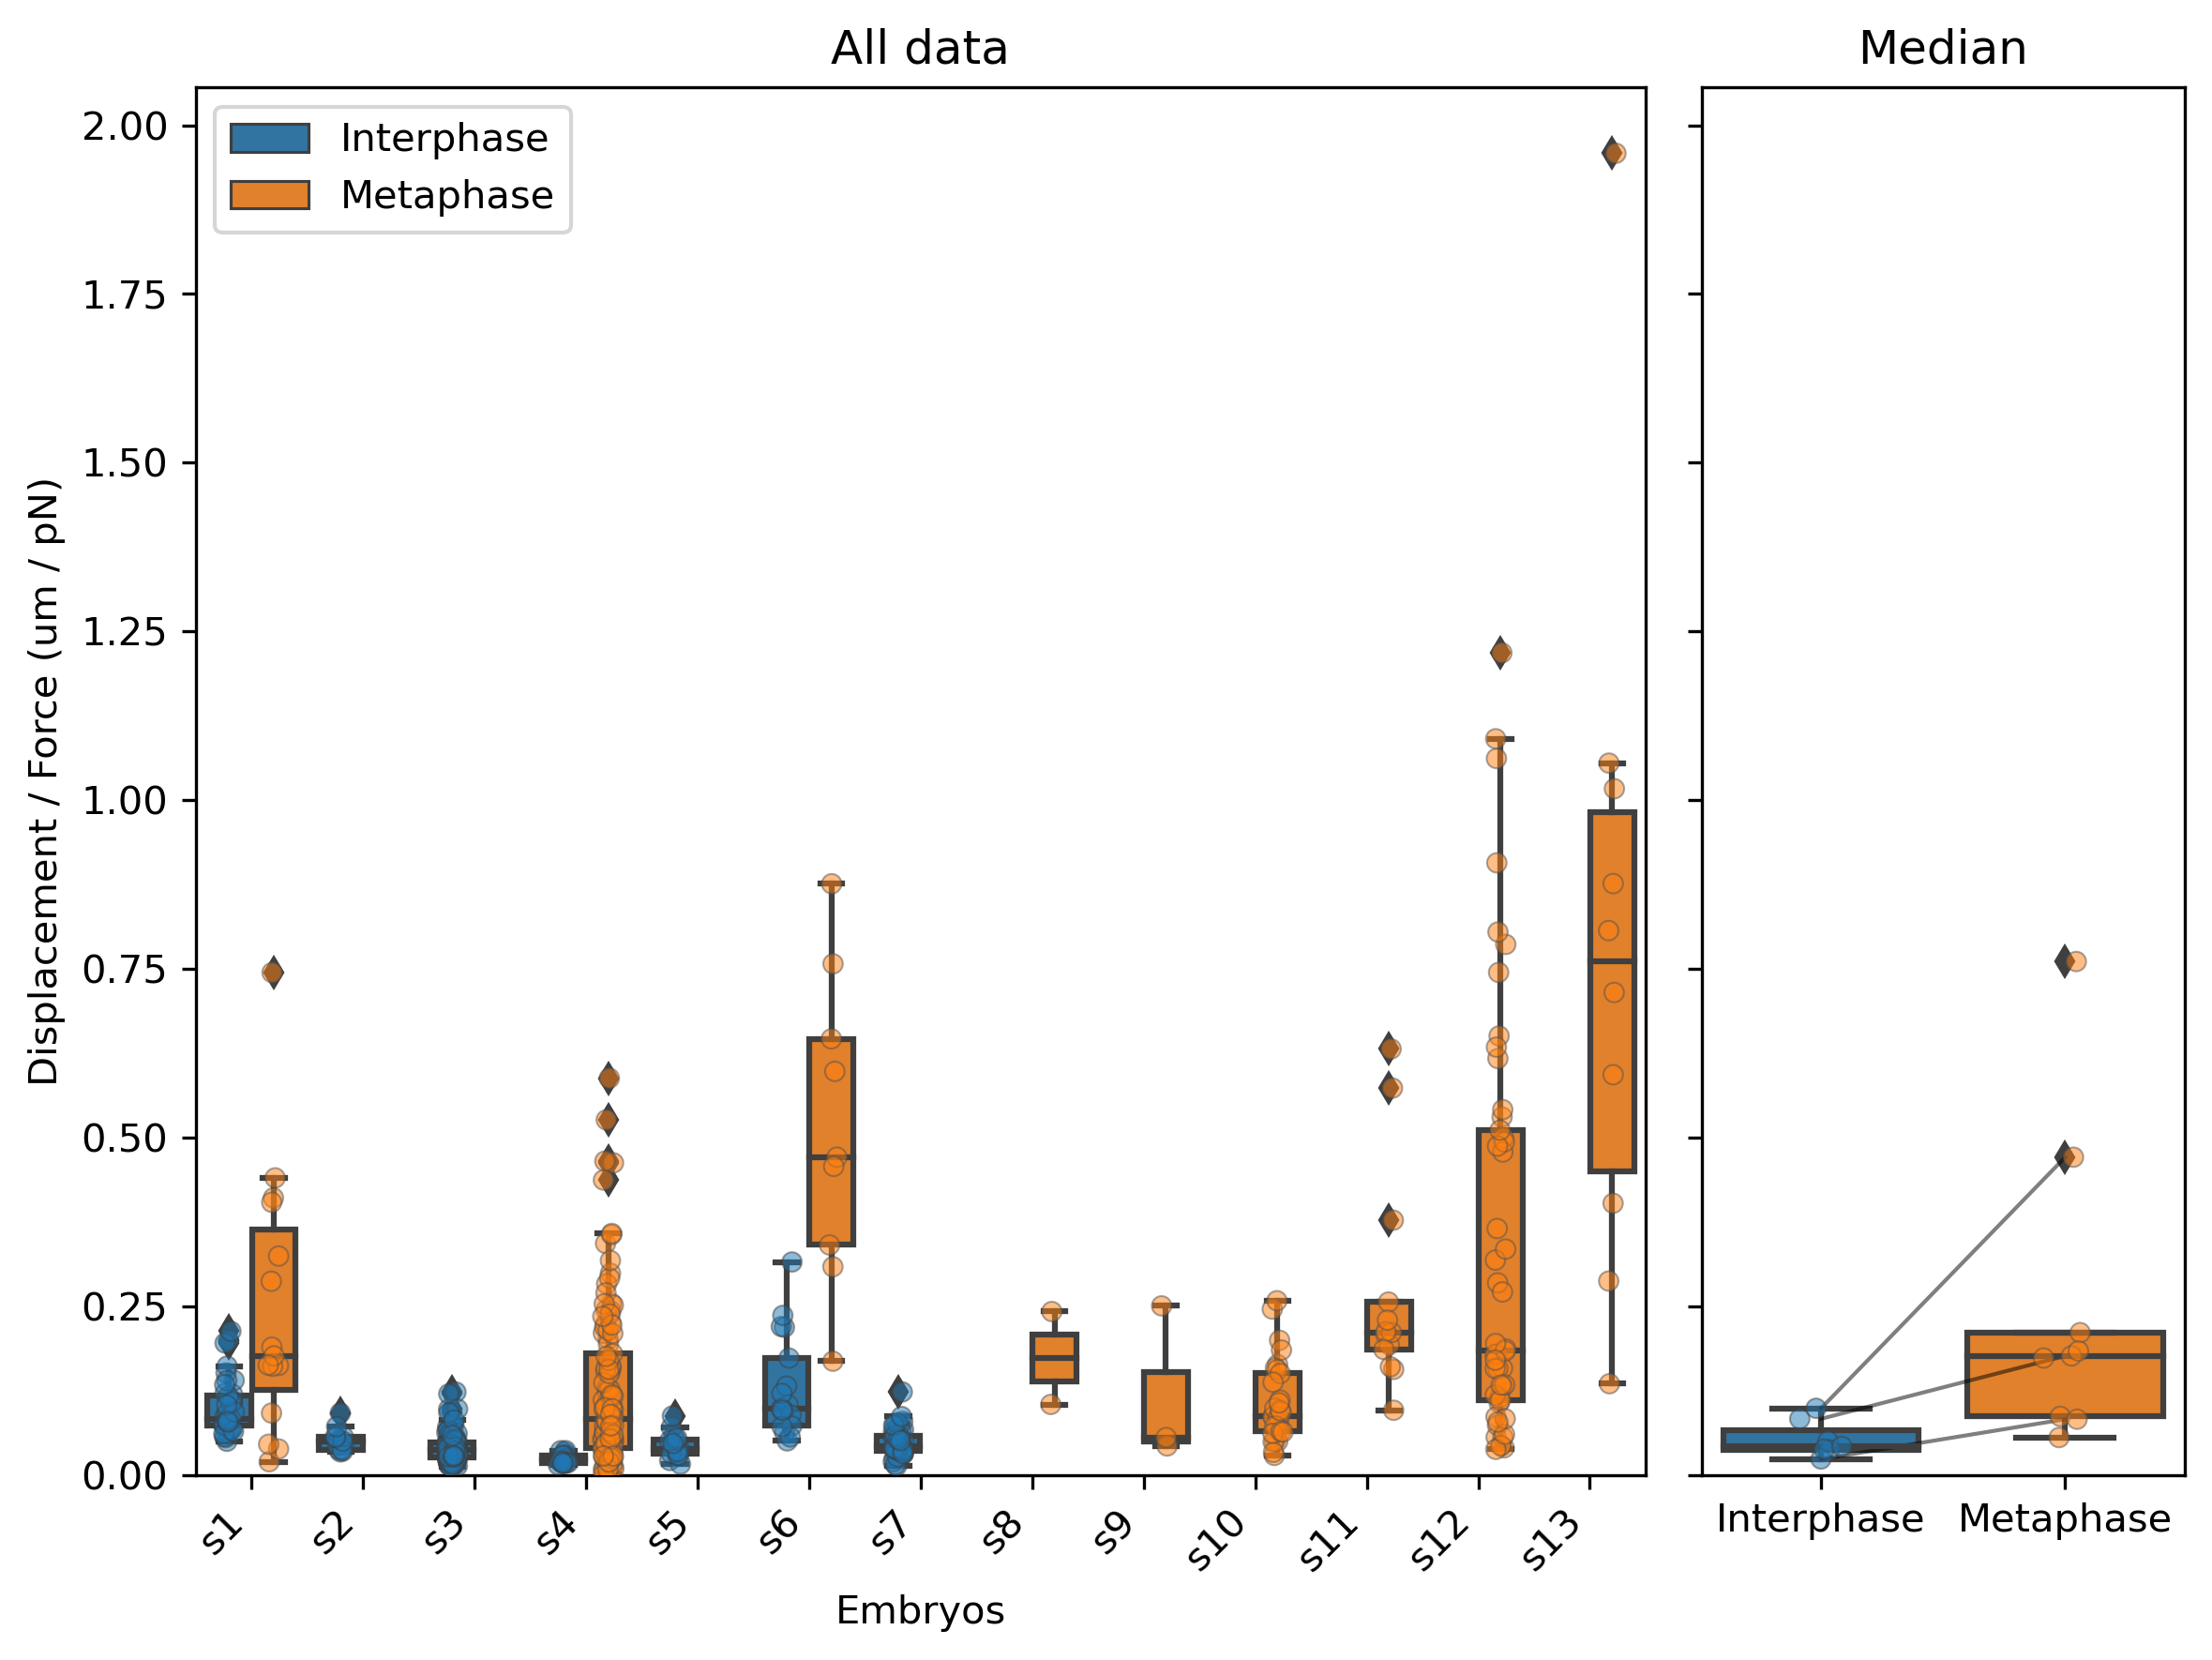

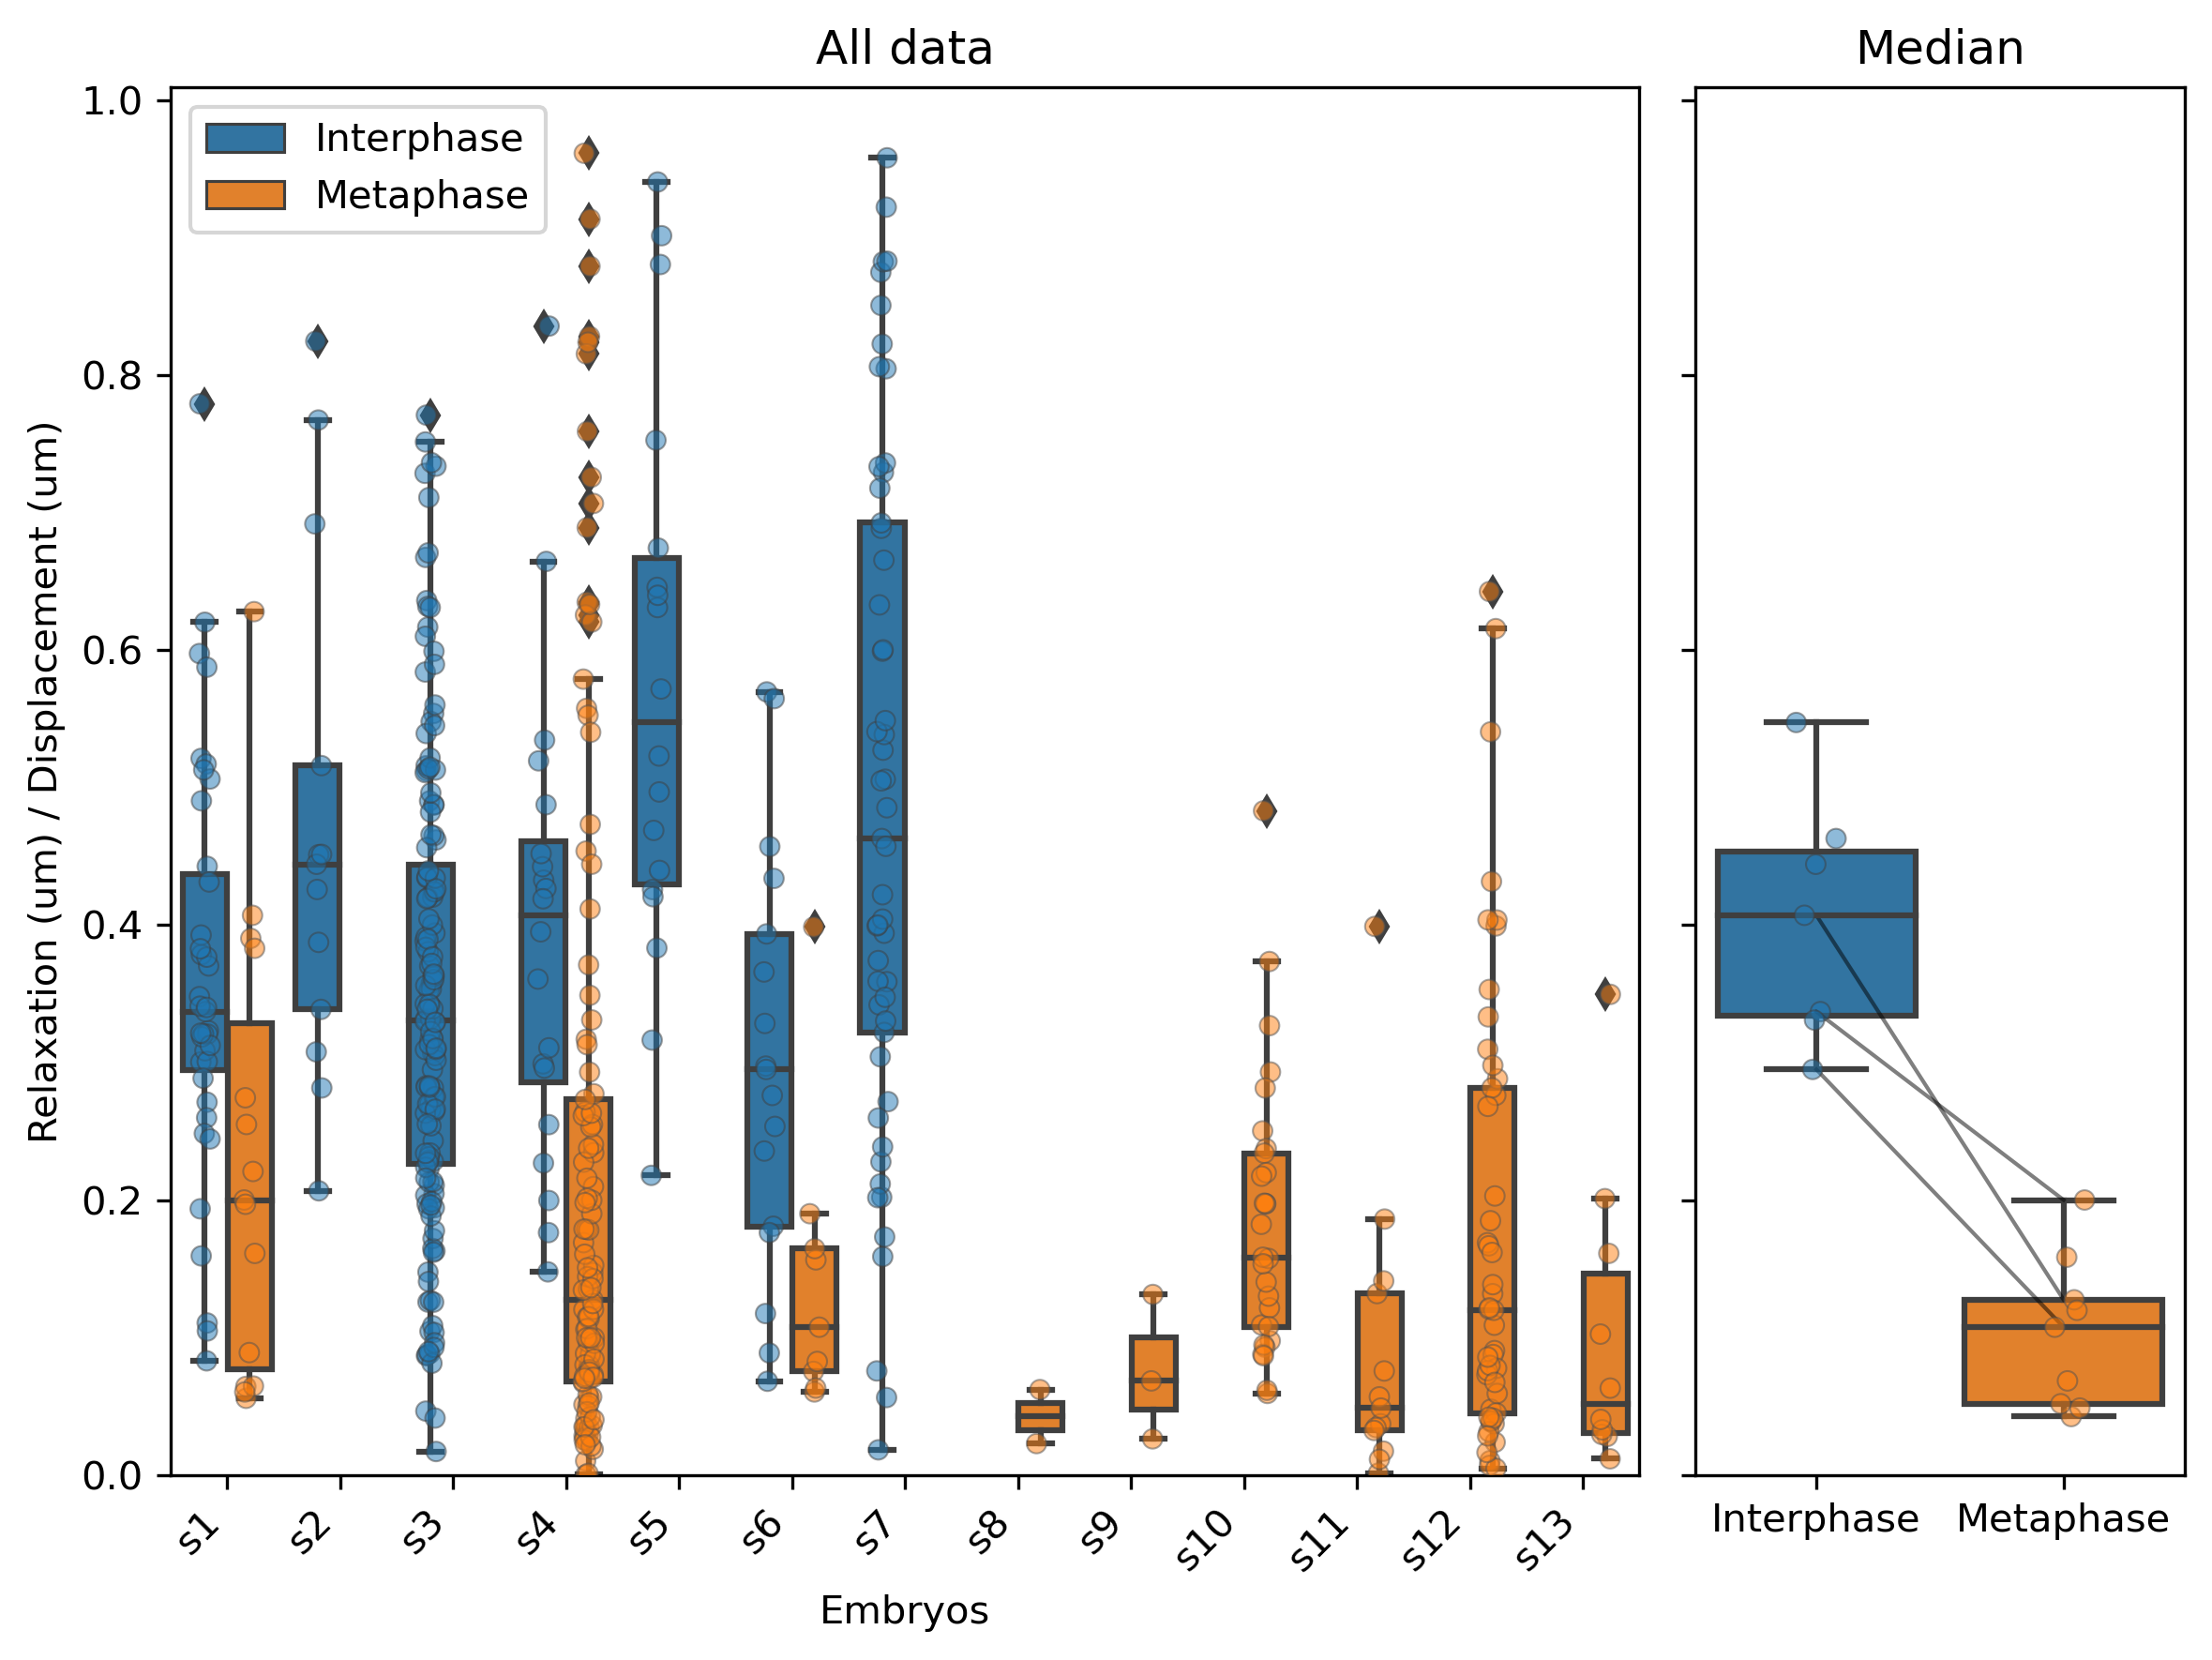

In [7]:
folder = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/measurements_extended_info/'

df_results = pd.DataFrame(columns = ['exp_date', 'sample', 'position', 'embryo', 'rep', 'rising_dif', 'relaxing_dif', 'rising_dif_norm', 'relative_dif', 'MT_status'])

for idx in range(len(df_general_info)):
    filepath = df_general_info['trackmate_file'].values[idx]
    filename = os.path.basename(filepath).split('.')[0]
    file_h5 = f'{filename}_extended.h5'
    # for pulse in pulses and track in track, calculate difference between first and last point
    df = pd.read_hdf(folder + file_h5, key='df')
    df = df.sort_values(by='POSITION_T')

    if 'exclude' in str(df_general_info['comments'].values[idx]):
        continue


    for track_id in df['TRACK_ID'].unique():
        track = df[df['TRACK_ID']==track_id]
        for pulse_n in track['PULSE_NUMBER'].unique():
            if pulse_n == 1:
                continue


            pulse = track[track['PULSE_NUMBER']==pulse_n]
            if not np.all(pulse['CORRECTED DISPLACEMENT [um]'].notna()):
                continue
            displacement = pulse['CORRECTED DISPLACEMENT [um]'].values

            rising_phase = pulse.loc[pulse['MAGNET_STATUS']==1, 'CORRECTED DISPLACEMENT [um]'].values/np.average(pulse.loc[pulse['MAGNET_STATUS']==1, 'FORCE [pN]'].values)
            rising_dif_norm = rising_phase[-1]-rising_phase[0]

            rising_phase = pulse.loc[pulse['MAGNET_STATUS']==1, 'CORRECTED DISPLACEMENT [um]'].values
            rising_dif = rising_phase[-1]-rising_phase[0]

            relaxing_phase = pulse.loc[pulse['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'].values
            relaxing_dif = relaxing_phase[-1]-relaxing_phase[0]
            if (relaxing_dif < 0) and (rising_dif > 0) and (- relaxing_dif/rising_dif <= 1):
                new_line = {
                    'exp_date': [filename.split('_')[0]], 
                    'sample': [filename.split('_')[1][0:3]], 
                    'position': [filename.split('_')[1][3:6]], 
                    'embryo': [filename.split('_')[0]+filename.split('_')[1][0:6]],
                    'rep': [filename.split('_')[1][6:9]], 
                    'rising_dif': [rising_dif], 
                    'relaxing_dif': [relaxing_dif], 
                    'rising_dif_norm': [rising_dif_norm], 
                    'relative_dif': [-relaxing_dif/rising_dif], 
                    'MT_status': [pulse['MT_STATUS'].values[0]]
                }

                df_results = pd.concat([df_results, pd.DataFrame(new_line)])

df_results.head()
df_results = df_results.sort_values(by=['MT_status', 'embryo'], ascending=[False, True])


for (param, label) in zip(['rising_dif', 'relaxing_dif', 'rising_dif_norm', 'relative_dif'], ['Displacement (um)', 'Relaxation (um)', 'Displacement / Force (um / pN)', 'Relaxation (um) / Displacement (um)']):

    df = df_results
    # Define the mapping
    mapping = {'y': 'Interphase', 'n': 'Metaphase'}

    # Create a new column based on the mapping
    df['Phase'] = df['MT_status'].map(mapping)

    # Calculate statistics
    stats = df.groupby(['MT_status', 'embryo'])[param].agg(['mean', 'std', 'median', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)])
    stats.columns = ['mean', 'std', 'median', 'q1', 'q3']
    stats = stats.reset_index()
    stats = stats.sort_values(by='MT_status', ascending=False)


    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 6), dpi=300, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

    # First subplot: Combined boxplot and stripplot

    sns.boxplot(ax=axes[0], x='embryo', y=param, hue='Phase', data=df)
    sns.stripplot(ax=axes[0], x='embryo', y=param, hue='Phase', dodge=True, data=df, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
    axes[0].set_xticks(ticks=range(len(df['embryo'].unique())))
    axes[0].set_xticklabels(labels=['s' + str(i+1) for i in range(len(df['embryo'].unique()))], rotation=45, ha='right')
    axes[0].set_ylabel(label)
    axes[0].set_xlabel('Embryos')

    # Add custom legend to the first plot
    axes[0].legend(loc='upper left')
    axes[0].set_title('All data')




    # Second subplot: Summary statistics
    sns.boxplot(ax=axes[1], x='MT_status', y='median', data=stats)
    sns.stripplot(ax=axes[1], x='MT_status', y='median', hue='MT_status', data=stats, jitter=True, alpha=0.5, linewidth=0.5, legend=False)
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_xticklabels(labels=['Interphase', 'Metaphase'])
    axes[1].set_title(f'Median')

    for idx in [0, 3, 5]:
        embryo = stats['embryo'].unique()[idx]
        axes[1].plot(['y', 'n'], stats.loc[stats['embryo']==embryo, 'median'].values, 'k-', alpha = 0.5, linewidth=1)

    # Show the plots
    if param != 'relaxing_dif':
        plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'{results_dir}result_{param}.png')
